# FINAL PROJECT OVERVIEW

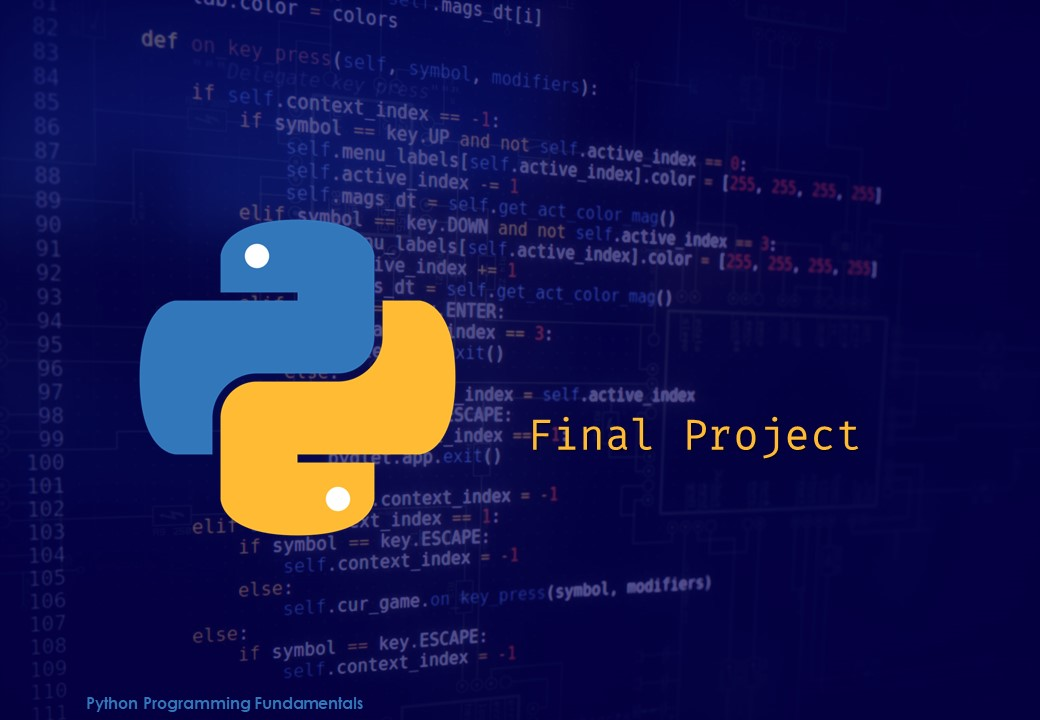

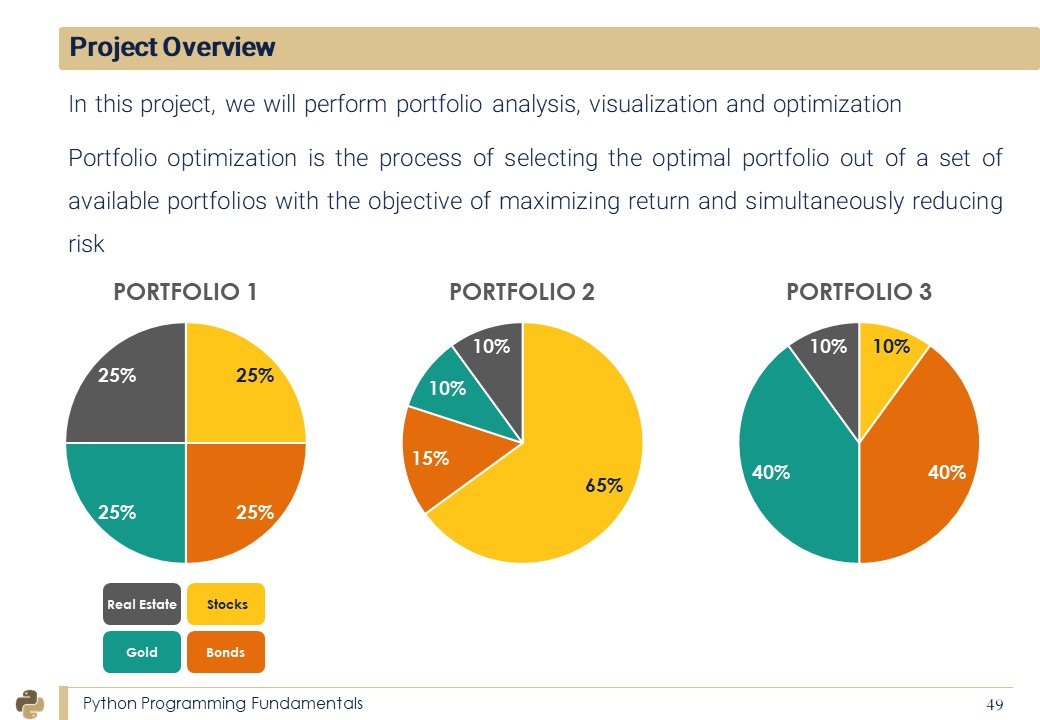

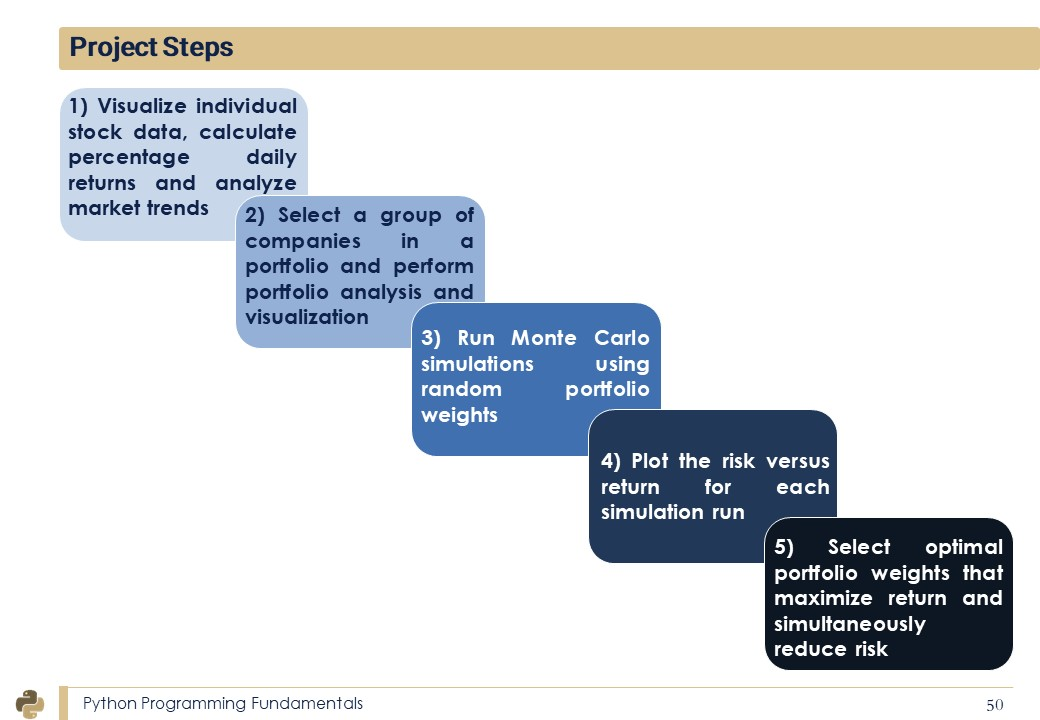

# IMPORT LIBRARIES AND DATASETS

In [ ]:
# Import key librares and modules 
import pandas as pd
import numpy as np

# Import datetime module that comes pre-installed in Python 
# datetime offers classes that work with date & time information
import datetime as dt

In [ ]:
# Use Pandas to read stock data (the csv file is included in the course package) 
stock_df = pd.read_csv('Amazon.csv')
stock_df.head(15)

In [ ]:
# Count the number of missing values in "stock_df" Pandas DataFrame
stock_df.isnull().sum()

In [ ]:
# Obtain information about the Pandas DataFrame such as data types, memory utilization..etc
stock_df.info()

**PRACTICE:**
- **Using Pandas library, read JPMorgan Chase & Co. stock prices data contained in "JPM.csv" file and place it in a Pandas DataFrame titled "JPM_df"**
- **Count the number of Null or missing values in "JPM_df" Pandas DataFrame**
- **What is the memory usage of "JPM_df" Pandas DataFrame?**

# CALCULATE PERCENTAGE DAILY RETURNS

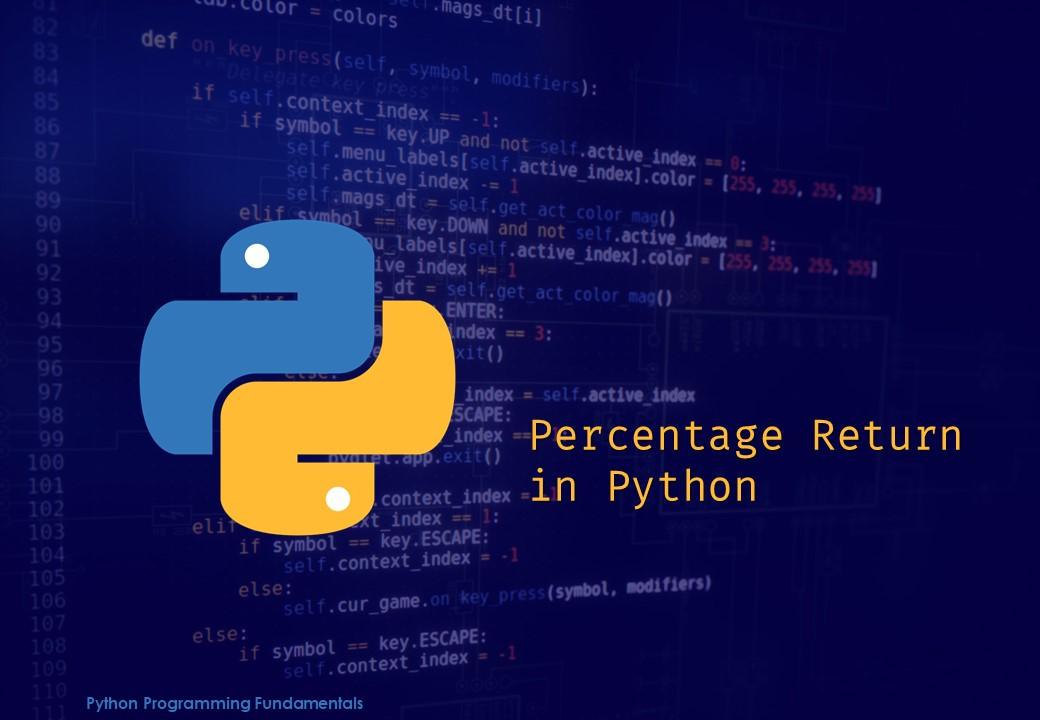

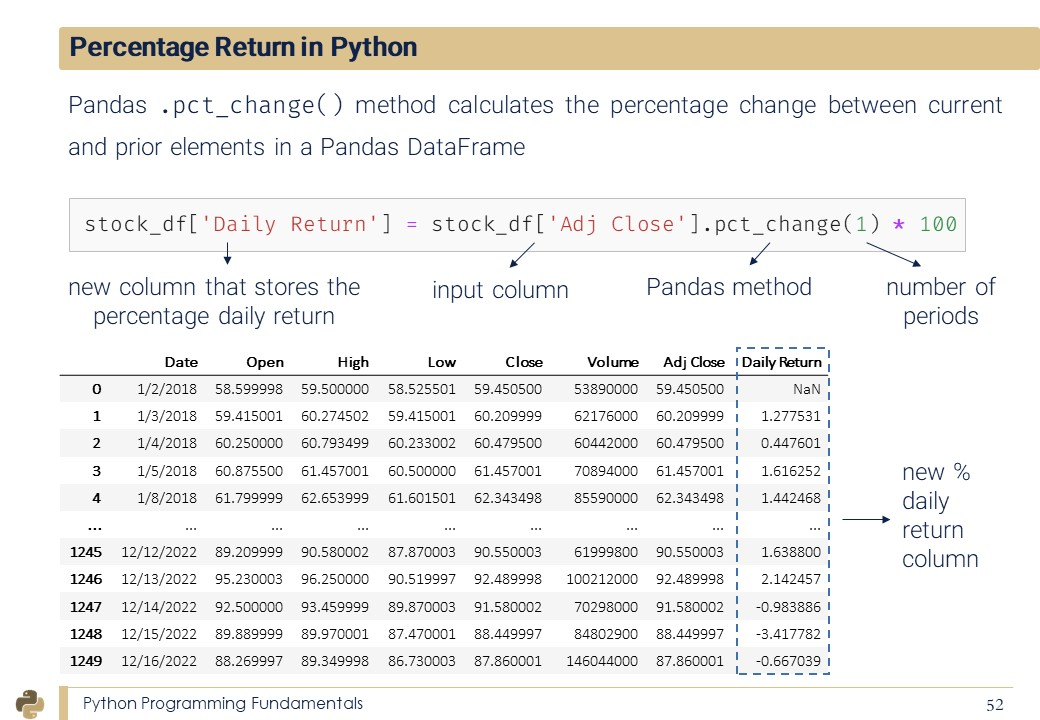

In [ ]:
# Calculate the percentage daily return
stock_df['Daily Return'] = stock_df['Adj Close'].pct_change(1) * 100
stock_df

In [ ]:
# Let's replace the first row with zeros instead of NaN
stock_df['Daily Return'].replace(np.nan, 0, inplace = True)
stock_df

In [ ]:
# Use the describe() method to obtain a statistical summary about the data 
# Over the specified time period, the average adjusted close price for Amazon stock was $120.07 
# The maximum adjusted close price was $186.57
# The maximum volume of shares traded on one day were 311,346,000
stock_df.describe().round(2)

**PRACTICE:**
- **Using the adjusted closing price, calculate the percentage daily return for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022.**
- **Calculate the maximum percentage daily return for JPMorgan Chase & Co. stock over the same time period.**

# PERFORM DATA VISUALIZATION FOR A SINGLE STOCK: PART 1

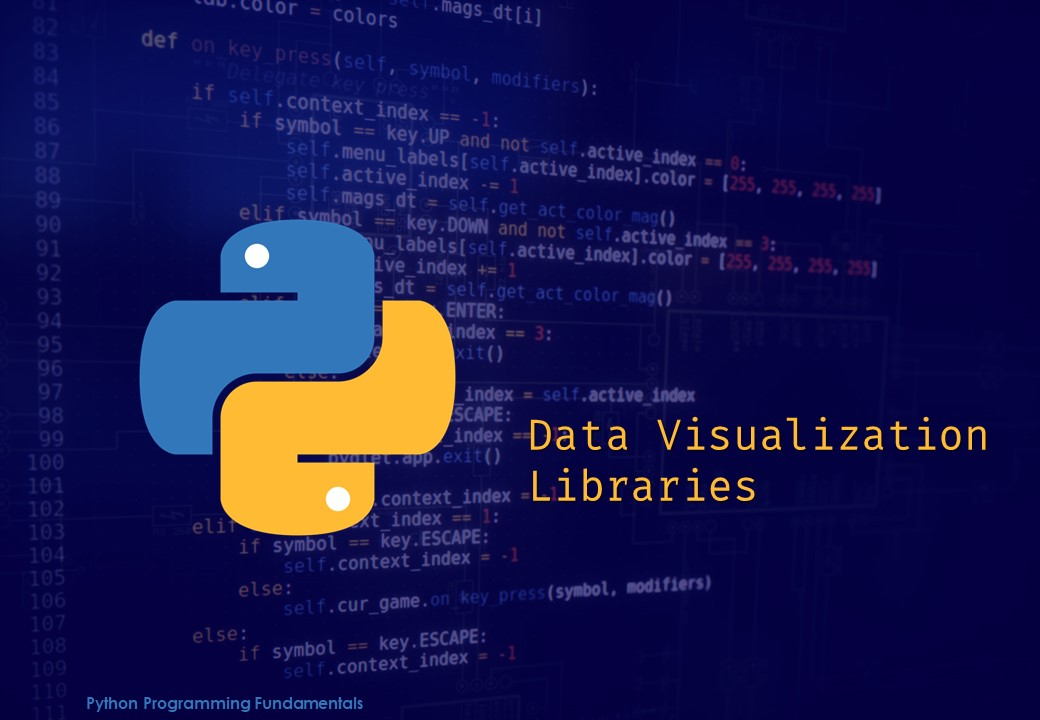

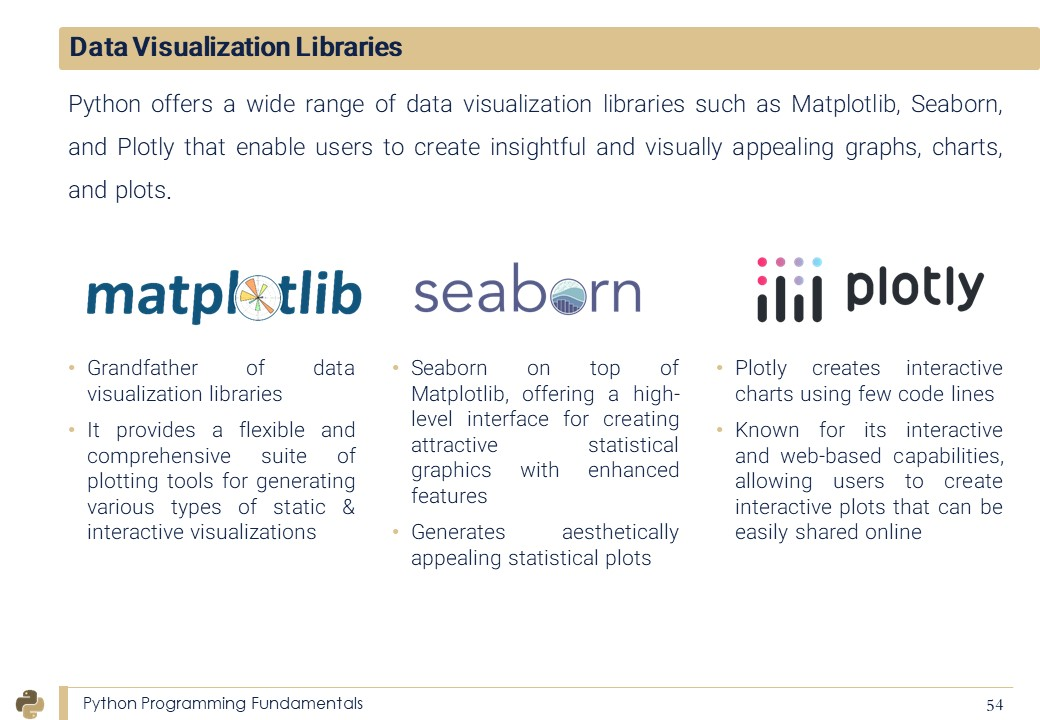

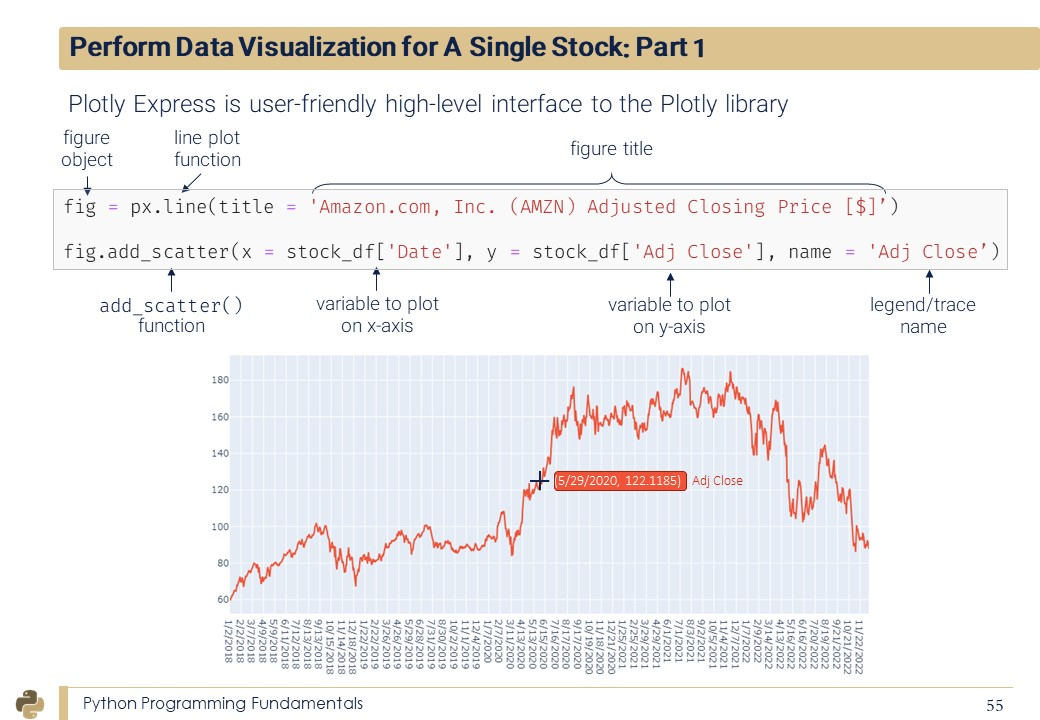

- Link to Matplotlib Documentation: https://matplotlib.org/
- Link to Seaborn Documentation: https://seaborn.pydata.org/
- Link to Plotly Documentation: https://plotly.com/python/

In [ ]:
# Matplotlib is a comprehensive data visualization library in Python 
# Seaborn is a visualization library that sits on top of matplotlib and offers enhanced features 
# plotly.express module contains functions that can create interactive figures using a few lines of code

import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

import plotly.express as px

In [ ]:
# Plot a Line Plot Using Plotly Express
fig = px.line(title = 'Amazon.com, Inc. (AMZN) Adjusted Closing Price [$]')
fig.add_scatter(x = stock_df['Date'], y = stock_df['Adj Close'], name = 'Adj Close')

In [ ]:
stock_df

In [ ]:
# Define a function that performs interactive data visualization using Plotly Express
def plot_financial_data(df, title):
    
    fig = px.line(title = title)
    
    # For loop that plots all stock prices in the pandas dataframe df
    # Note that index starts with 1 because we want to skip the date column
    
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
        fig.update_traces(line_width = 5)
        fig.update_layout({'plot_bgcolor': "white"})

    fig.show()

In [ ]:
# Plot High, Low, Open, Close and Adj Close
plot_financial_data(stock_df.drop(['Volume', 'Daily Return'], axis = 1), 'Amazon.com, Inc. (AMZN) Stock Price [$]')

In [ ]:
# Plot trading volume
plot_financial_data(stock_df.iloc[:,[0,5]], 'Amazon.com, Inc. (AMZN) Trading Volume')

In [ ]:
# Plot % Daily Returns
plot_financial_data(stock_df.iloc[:,[0,7]], 'Amazon.com, Inc. (AMZN) Percentage Daily Return [%]')

**PRACTICE:**
- **Plot the high, low, open, close and adjusted close price for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022 using Plotly Express library.**
- **Plot the trading volume for JPMorgan Chase & Co. stock during the same time period using Plotly Express Library.**
- **Plot the percentage daily return during the same time period using Plotly Express. Perform a sanity check by comparing the maximum percentage daily return calculated in the previous practice opportunity to the maximum value shown on the graph.**

# PERFORM DATA VISUALIZATION FOR A SINGLE STOCK: PART 2

In [ ]:
# Define a function that classifies the returns based on the magnitude
# Feel free to change these numbers
def percentage_return_classifier(percentage_return):
    
    if percentage_return > -0.3 and percentage_return <= 0.3:
        return 'Insignificant Change'
    elif percentage_return > 0.3 and percentage_return <= 3:
        return 'Positive Change'
    elif percentage_return > -3 and percentage_return <= -0.3:
        return 'Negative Change'
    elif percentage_return > 3 and percentage_return <= 7:
        return 'Large Positive Change'
    elif percentage_return > -7 and percentage_return <= -3:
        return 'Large Negative Change'
    elif percentage_return > 7:
        return 'Bull Run'
    elif percentage_return <= -7:
        return 'Bear Sell Off'

In [ ]:
# Apply the function to the "Daily Return" Column and place the result in "Trend" column
stock_df['Trend'] = stock_df['Daily Return'].apply(percentage_return_classifier)
stock_df

In [ ]:
# Count distinct values in the Trend column
trend_summary = stock_df['Trend'].value_counts()
trend_summary

In [ ]:
# Plot a pie chart using Matplotlib Library
plt.figure(figsize = (8, 8))
trend_summary.plot(kind = 'pie', y = 'Trend');

**PRACTICE:**
- **Using Matplotlib library, plot a similar pie chart for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022.**

# PERFORM DATA VISUALIZATION FOR A SINGLE STOCK: PART 3

In [ ]:
# Let's plot a candlestick graph using Cufflinks library
# Cufflinks is a powerful Python library that connects Pandas and Plotly for generating plots using few lines of code
# Cufflinks allows for interactive data visualization
! pip install cufflinks
import cufflinks as cf
cf.go_offline() # Enabling offline mode for interactive data visualization locally

In [ ]:
stock_df

In [ ]:
# Set the date to be the index for the Pandas DataFrame
# This is critical to show the date on the x-axis when using cufflinks
stock_df.set_index(['Date'], inplace = True)
stock_df

In [ ]:
# Plot Candlestick figure using Cufflinks QuantFig module
figure = cf.QuantFig(stock_df, title = 'Amazon.com, Inc. (AMZN) Candlestick Chart', name = 'AMZN')
figure.add_sma(periods =[14, 21], column = 'Close', color = ['magenta', 'green'])
figure.iplot(theme = 'white', up_color = 'green', down_color = 'red')

**PRACTICE:**
- **Using Cufflinks, plot candlestick chart for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022. Remember to set the "Date" column as the index for "JPM_df" Pandas DataFrame.** 
- **Display the simple moving average with 30 and 100 days window on the previously generated candlestick graph.**
- **Display the Bollinger bands on a new candlestick graph. Bollinger bands are powerful technical analysis tool that contain 3 lines: (1) a simple moving average (middle band), (2) an upper and (3) a lower band. Choose a window length of 20 periods and 2 standard deviations. [external research is required]**

# PERFORM DATA VISUALIZATION FOR MULTIPLE STOCKS

In [ ]:
# Let's read multiple stocks data contained in "stock_prices.csv" attached in the course package 
# The Appendix includes details on how to obtain this data using yfinance and Pandas Datareader 
# Note that yfinance and Pandas Datareader might experience outage in some geographical regions

# We will focus our analysis on U.S. stocks, similar analysis could be performed on Asian, European or African stocks  
# AMZN: Amazon Inc. - Multinational tech company focusing on e-commerce, cloud computing, and artificial intelligence
# JPM: JPMorgan Chase and Co. - Multinational investment bank and financial services holding company
# META: Meta Platforms, formerly named Facebook Inc. - META owns Facebook, Instagram, and WhatsApp
# PG: Procter and Gamble (P&G) - Multinational consumer goods corporation
# GOOG: Google (Alphabet Inc.) - Multinational company that focuses on search engine tech, e-commerce, Cloud and AI 
# CAT: Caterpillar - World's largest construction-equipment manufacturer
# PFE: Pfizer Inc. - Multinational pharmaceutical and biotechnology corporation
# EXC: Exelon - An American Fortune 100 energy company 
# DE: Deere & Company (John Deere) - Manufactures agricultural machinery and heavy equipment
# JNJ: Johnson & Johnson - A multinational corporation that develops medical devices and pharmaceuticals

close_price_df = pd.read_csv('stock_prices.csv')
close_price_df

In [ ]:
# The objective of this code cell is to calculate the percentage daily return
# We will perform this calculation on all stocks except for the first column which is "Date"
daily_returns_df = close_price_df.iloc[:, 1:].pct_change() * 100
daily_returns_df.replace(np.nan, 0, inplace = True)
daily_returns_df

In [ ]:
# Insert the date column at the start of the Pandas DataFrame (@ index = 0)
daily_returns_df.insert(0, "Date", close_price_df['Date'])
daily_returns_df

In [ ]:
# Plot closing prices using plotly Express. Note that we used the same pre-defined function "plot_financial_data"
plot_financial_data(close_price_df, 'Adjusted Closing Prices [$]')

In [ ]:
# Plot the stocks daily returns
plot_financial_data(daily_returns_df, 'Percentage Daily Returns [%]')

In [ ]:
# Plot histograms for stocks daily returns using plotly express
# Compare META to JNJ daily returns histograms
fig = px.histogram(daily_returns_df.drop(columns = ['Date']))
fig.update_layout({'plot_bgcolor': "white"})

In [ ]:
# Plot a heatmap showing the correlations between daily returns
# Strong positive correlations between Catterpillar and John Deere - both into heavy equipment and machinery
# META and Google - both into Tech and Cloud Computing
plt.figure(figsize = (10, 8))
sns.heatmap(daily_returns_df.drop(columns = ['Date']).corr(), annot = True);

In [ ]:
# Plot the Pairplot between stocks daily returns
sns.pairplot(daily_returns_df);

In [ ]:
# Function to scale stock prices based on their initial starting price
# The objective of this function is to set all prices to start at a value of 1 
def price_scaling(raw_prices_df):
    scaled_prices_df = raw_prices_df.copy()
    for i in raw_prices_df.columns[1:]:
          scaled_prices_df[i] = raw_prices_df[i]/raw_prices_df[i][0]
    return scaled_prices_df

In [ ]:
price_scaling(close_price_df)

**PRACTICE:**
- **Using "price_scaling" and "plot_financial_data" functions, plot the scaled data (closing prices) for all stocks.**
- **Based on the generated graph, which stock had the best and worst performance?** 

# DEFINE A FUNCTION THAT GENERATES RANDOM PORTFOLIO WEIGHTS

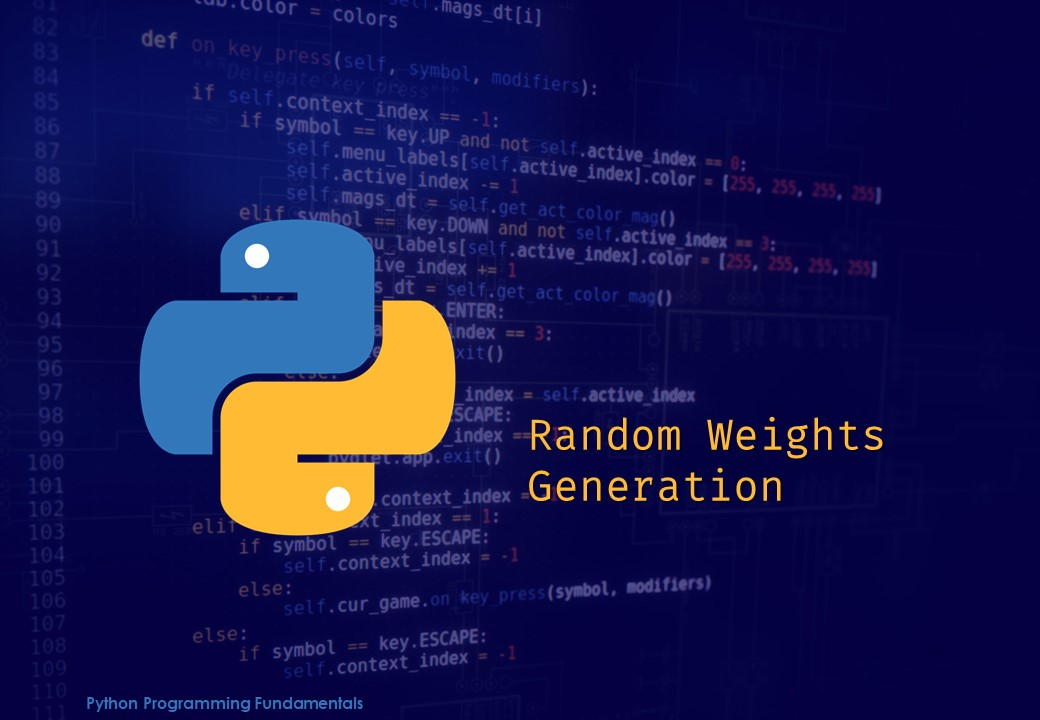

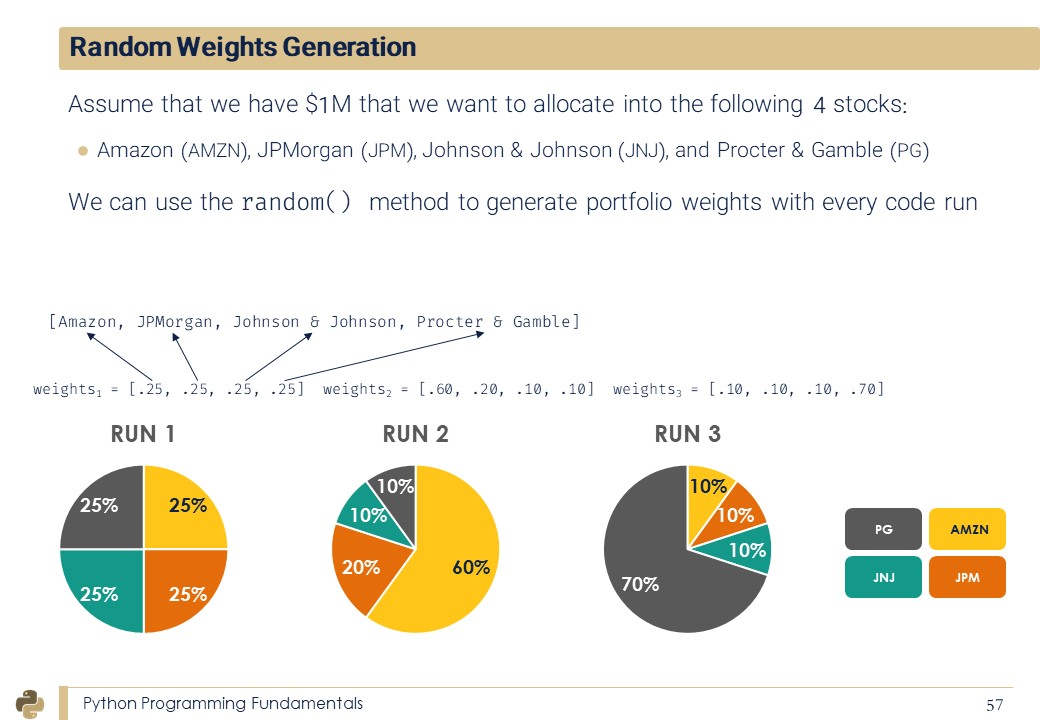

In [ ]:
# Let's create an array that holds random portfolio weights
# Note that portfolio weights must add up to 1 
import random

def generate_portfolio_weights(n):
    weights = []
    for i in range(n):
        weights.append(random.random())
        
    # let's make the sum of all weights add up to 1
    weights = weights/np.sum(weights)
    return weights

In [ ]:
# Call the function (Run this cell multiple times to generate different outputs)
weights = generate_portfolio_weights(4)
print(weights)

**PRACTICE:**
- **Assume we now have 10 stocks under consideration, test the function using the new number of stocks.** 
- **Perform a sanity check and ensure that the sum of all weights is equal to 1.**

# PERFORM ASSET ALLOCATION & CALCULATE PORTFOLIO DAILY VALUE/RETURN

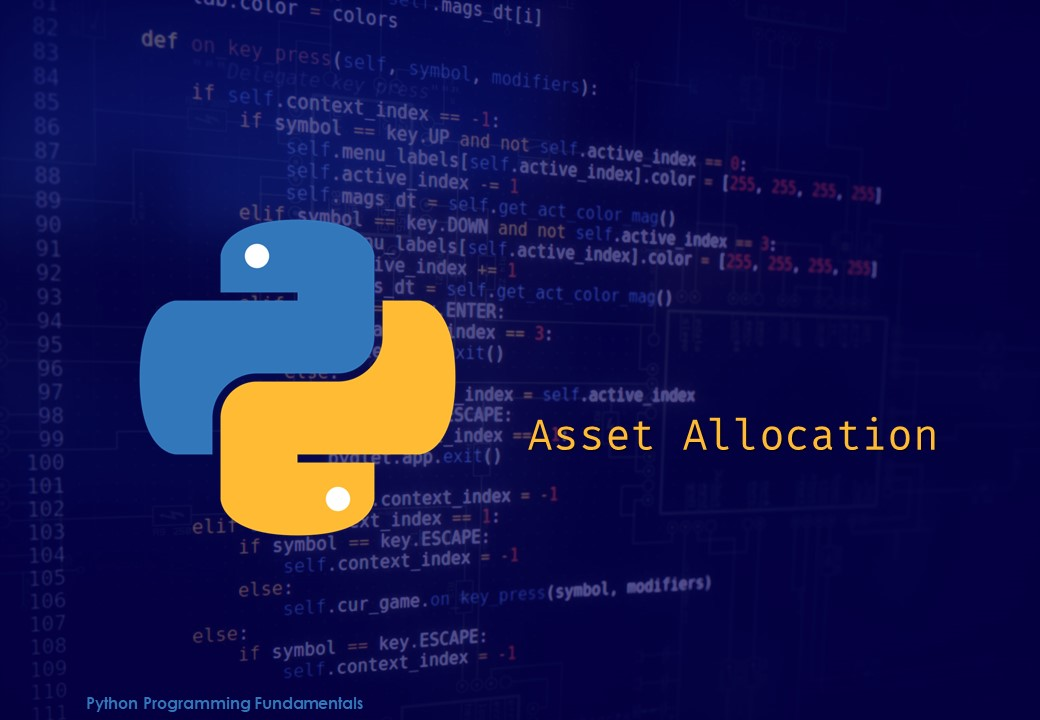

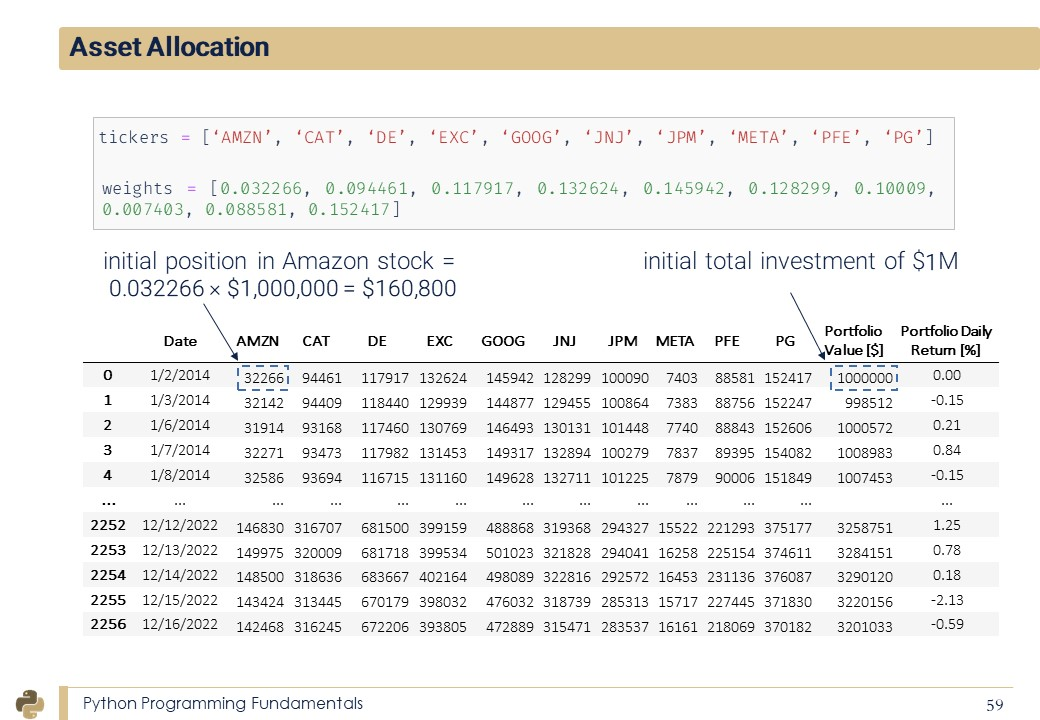

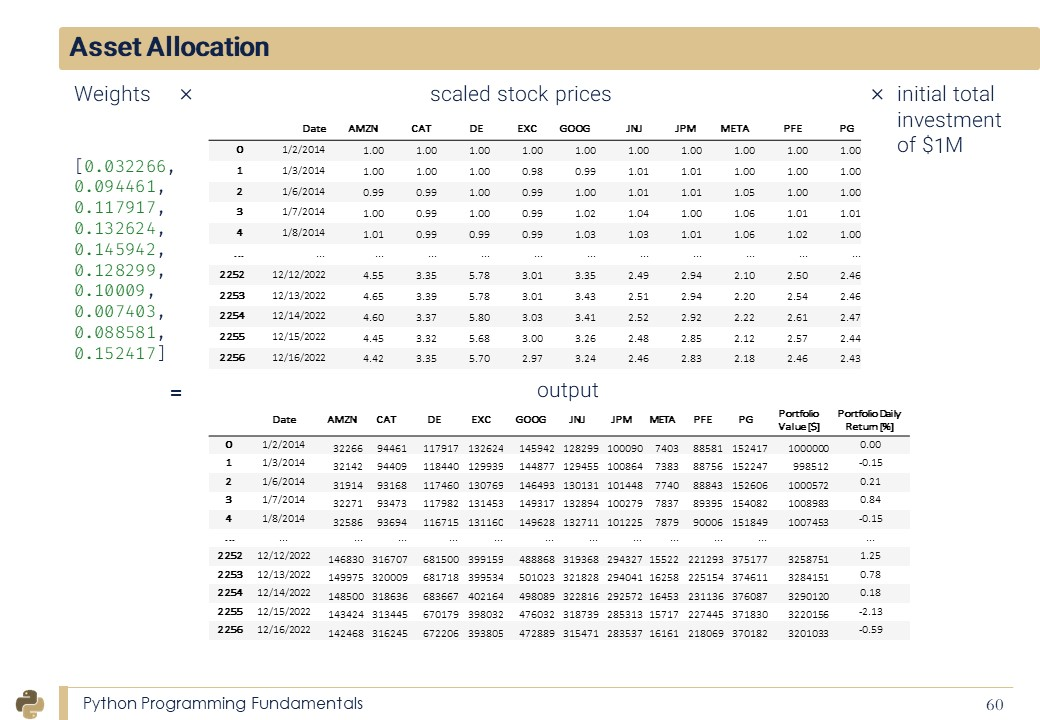

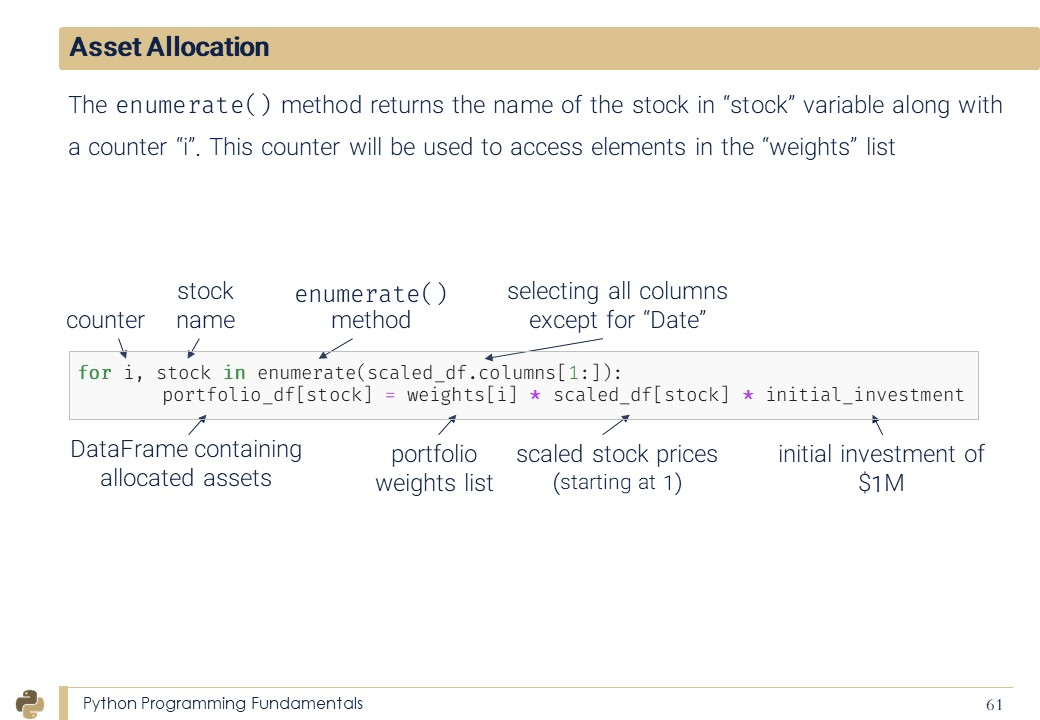

In [ ]:
# Let's define the "weights" list similar to the slides
weights = [0.032266, 0.094461, 0.117917, 0.132624, 0.145942, 0.128299, 0.10009, 0.007403, 0.088581, 0.152417]
weights

In [ ]:
# Let's display "close_price_df" Pandas DataFrame
close_price_df

In [ ]:
# Scale stock prices using the "price_scaling" function that we defined earlier (make all stock values start at 1)
portfolio_df = close_price_df.copy()
scaled_df = price_scaling(portfolio_df)
scaled_df

In [ ]:
# Use enumerate() method to obtain the stock names along with a counter "i" (0, 1, 2, 3,..etc.)
# This counter "i" will be used as an index to access elements in the "weights" list
initial_investment = 1000000
for i, stock in enumerate(scaled_df.columns[1:]):
    portfolio_df[stock] = weights[i] * scaled_df[stock]  * initial_investment
portfolio_df.round(1)

In [ ]:
# Assume that we have $1,000,000 that we would like to invest in one or more of the selected stocks
# Let's create a function that receives the following arguments: 
      # (1) Stocks closing prices
      # (2) Random weights 
      # (3) Initial investment amount
# The function will return a DataFrame that contains the following:
      # (1) Daily value (position) of each individual stock over the specified time period
      # (2) Total daily value of the portfolio 
      # (3) Percentage daily return 

def asset_allocation(df, weights, initial_investment):
    portfolio_df = df.copy()

    # Scale stock prices using the "price_scaling" function that we defined earlier (Make them all start at 1)
    scaled_df = price_scaling(df)
  
    for i, stock in enumerate(scaled_df.columns[1:]):
        portfolio_df[stock] = scaled_df[stock] * weights[i] * initial_investment

    # Sum up all values and place the result in a new column titled "portfolio value [$]" 
    # Note that we excluded the date column from this calculation
    portfolio_df['Portfolio Value [$]'] = portfolio_df[portfolio_df != 'Date'].sum(axis = 1, numeric_only = True)
            
    # Calculate the portfolio percentage daily return and replace NaNs with zeros
    portfolio_df['Portfolio Daily Return [%]'] = portfolio_df['Portfolio Value [$]'].pct_change(1) * 100 
    portfolio_df.replace(np.nan, 0, inplace = True)
    
    return portfolio_df

In [ ]:
# Now let's put this code in a function and generate random weights
# Let's obtain the number of stocks under consideration (note that we ignored the "Date" column) 
n = len(close_price_df.columns)-1

# Let's generate random weights 
print('Number of stocks under consideration = {}'.format(n))
weights = generate_portfolio_weights(n).round(6)
print('Portfolio weights = {}'.format(weights))

# Let's test out the "asset_allocation" function
portfolio_df = asset_allocation(close_price_df, weights, 1000000)
portfolio_df.round(2)

In [ ]:
# Plot the portfolio percentage daily return
plot_financial_data(portfolio_df[['Date', 'Portfolio Daily Return [%]']], 'Portfolio Percentage Daily Return [%]')

# Plot each stock position in our portfolio over time
# This graph shows how our initial investment in each individual stock grows over time
plot_financial_data(portfolio_df.drop(['Portfolio Value [$]', 'Portfolio Daily Return [%]'], axis = 1), 'Portfolio positions [$]')

# Plot the total daily value of the portfolio (sum of all positions)
plot_financial_data(portfolio_df[['Date', 'Portfolio Value [$]']], 'Total Portfolio Value [$]')

**PRACTICE:** 
- **Generate 3 different random weights and perform asset allocation using the pre-defined "asset_allocation" function.** 
- **Compare the final portfolio value on December 16th, 2022 to the initial investment ($1M) on January 2nd, 2014. Comment on your results.**
- *Hint: you will need to run the code 3 different times and examine the results. No additional code is required.*

# DEFINE THE "SIMULATION" FUNCTION THAT PERFORMS ASSET ALLOCATION, AND CALCULATES KEY PORTFOLIO METRICS

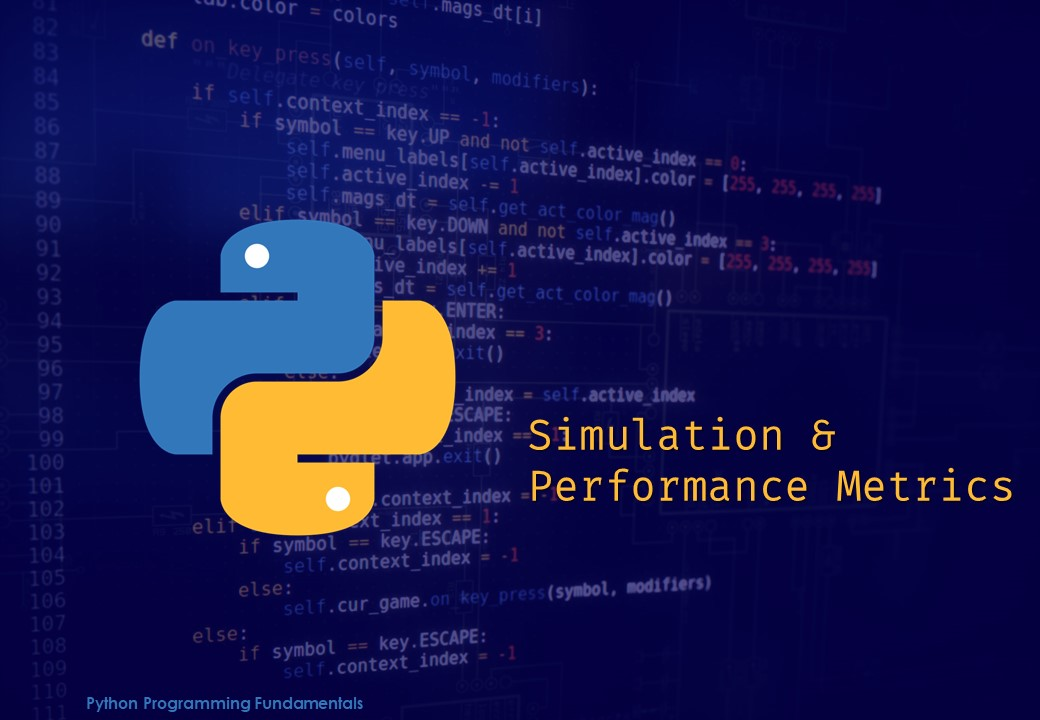

In [ ]:
# Let's define the simulation engine function 
# The function receives: 
    # (1) portfolio weights
    # (2) initial investment amount
# The function performs asset allocation and calculates portfolio statistical metrics including Sharpe ratio
# The function returns: 
    # (1) Expected portfolio return 
    # (2) Expected volatility 
    # (3) Sharpe ratio 
    # (4) Return on investment 
    # (5) Final portfolio value in dollars


def simulation_engine(weights, initial_investment):
    # Perform asset allocation using the random weights (sent as arguments to the function)
    portfolio_df = asset_allocation(close_price_df, weights, initial_investment)
  
    # Calculate the return on the investment 
    # Return on investment is calculated using the last final value of the portfolio compared to its initial value
    return_on_investment = ((portfolio_df['Portfolio Value [$]'][-1:] - 
                             portfolio_df['Portfolio Value [$]'][0])/ 
                             portfolio_df['Portfolio Value [$]'][0]) * 100
  
    # Daily change of every stock in the portfolio (Note that we dropped the date, portfolio daily worth and daily % returns) 
    portfolio_daily_return_df = portfolio_df.drop(columns = ['Date', 'Portfolio Value [$]', 'Portfolio Daily Return [%]'])
    portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1) 
  
    # Portfolio Expected Return formula
    expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean() ) * 252
  
    # Portfolio volatility (risk) formula
    # The risk of an asset is measured using the standard deviation which indicates the dispertion away from the mean
    # The risk of a portfolio is not a simple sum of the risks of the individual assets within the portfolio
    # Portfolio risk must consider correlations between assets within the portfolio which is indicated by the covariance 
    # The covariance determines the relationship between the movements of two random variables
    # When two stocks move together, they have a positive covariance when they move inversely, the have a negative covariance 

    covariance = portfolio_daily_return_df.cov() * 252 
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

    # Check out the chart for the 10-years U.S. treasury at https://ycharts.com/indicators/10_year_treasury_rate
    rf = 0.03 # Try to set the risk free rate of return to 1% (assumption)

    # Calculate Sharpe ratio
    sharpe_ratio = (expected_portfolio_return - rf)/expected_volatility 
    return expected_portfolio_return, expected_volatility, sharpe_ratio, portfolio_df['Portfolio Value [$]'][-1:].values[0], return_on_investment.values[0]
  

In [ ]:
# Let's test out the "simulation_engine" function and print out statistical metrics
# Define the initial investment amount
initial_investment = 1000000
portfolio_metrics = simulation_engine(weights, initial_investment)

In [ ]:
print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[0] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[2]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[3]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[4]))


**PRACTICE:** 
- **Assume that you decided to perform equal asset allocation among the 10 available stocks in "portfolio_df" DataFrame. Complete the following tasks:** 
    - **Define a new "weights" list that contains equal allocation among all assets.**
    - **Call "simulation_engine" function and send it the new weights. Record the Sharpe ratio and portfolio final value.**
    - **Assume that the risk-free rate is now set to 1%. How does that change impact Sharpe ratio? confirm your answer by changing the risk free-rate, running the code, and recording the new Sharpe ratio.** 

# RUN MONTE CARLO SIMULATIONS 

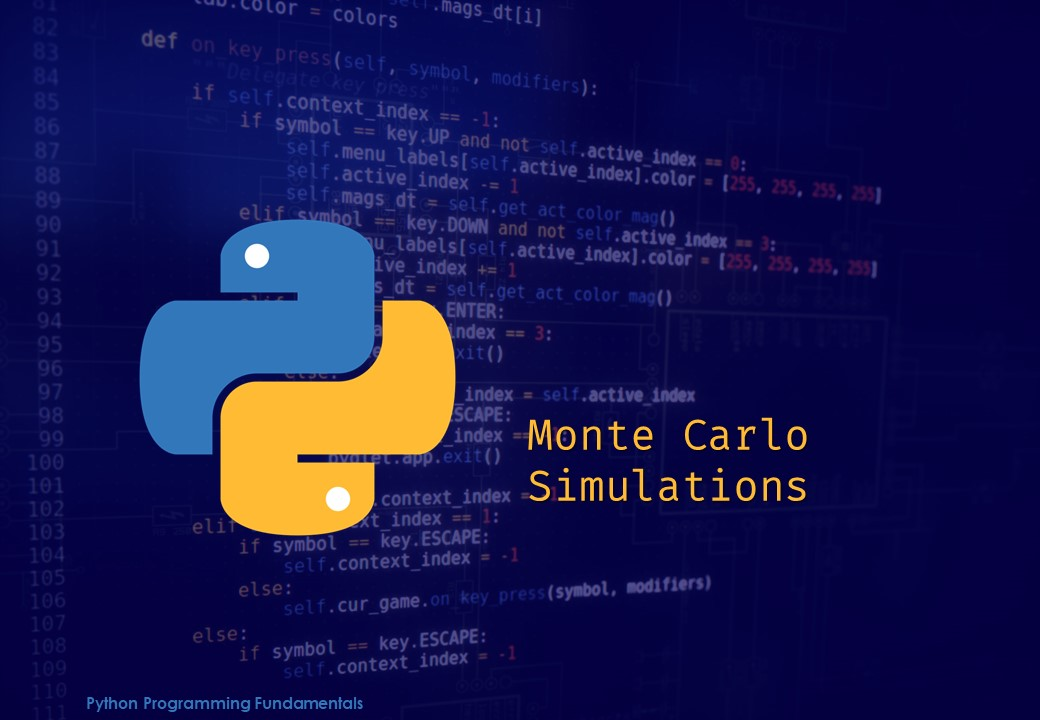

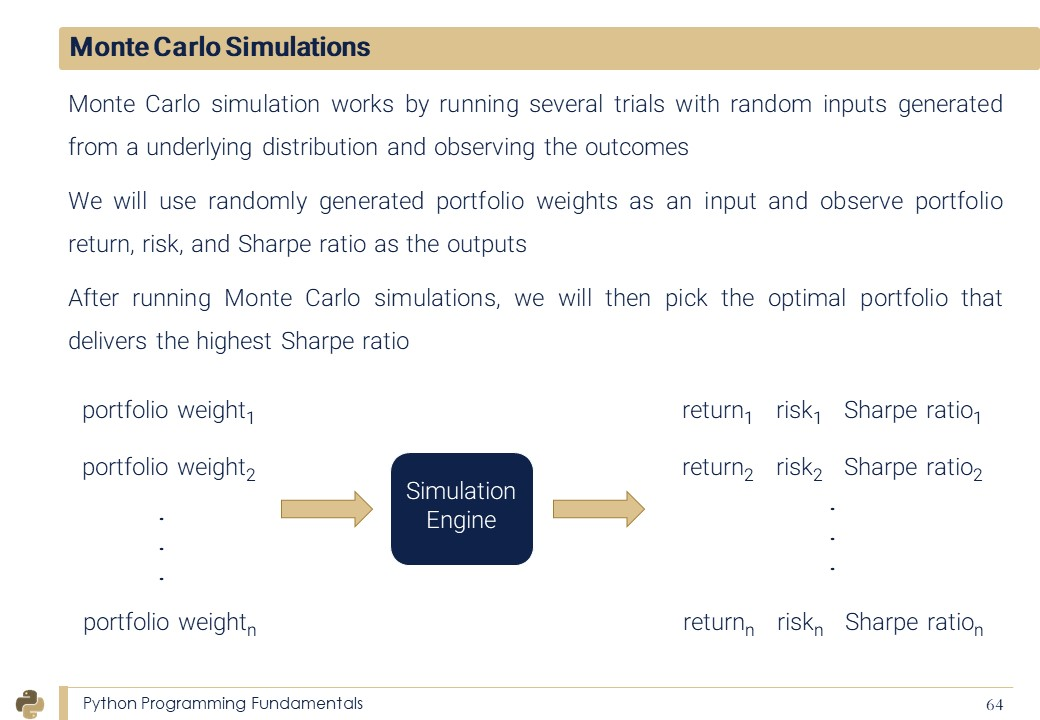

In [ ]:
# Set the number of simulation runs
sim_runs = 10000
initial_investment = 1000000

# Placeholder to store all weights
weights_runs = np.zeros((sim_runs, n))

# Placeholder to store all Sharpe ratios
sharpe_ratio_runs = np.zeros(sim_runs)

# Placeholder to store all expected returns
expected_portfolio_returns_runs = np.zeros(sim_runs)

# Placeholder to store all volatility values
volatility_runs = np.zeros(sim_runs)

# Placeholder to store all returns on investment
return_on_investment_runs = np.zeros(sim_runs)

# Placeholder to store all final portfolio values
final_value_runs = np.zeros(sim_runs)

for i in range(sim_runs):
    # Generate random weights 
    weights = generate_portfolio_weights(n)
    # Store the weights
    weights_runs[i,:] = weights
    
    # Call "simulation_engine" function and store Sharpe ratio, return and volatility
    # Note that asset allocation is performed using the "asset_allocation" function  
    expected_portfolio_returns_runs[i], volatility_runs[i], sharpe_ratio_runs[i], final_value_runs[i], return_on_investment_runs[i] = simulation_engine(weights, initial_investment)
    print("Simulation Run = {}".format(i))   
    print("Weights = {}, Final Value = ${:.2f}, Sharpe Ratio = {:.2f}".format(weights_runs[i].round(3), final_value_runs[i], sharpe_ratio_runs[i]))   
    print('\n')


**PRACTICE:** 
- **Run Monte Carlo Simulations for 50 and 10000 runs.**
- **Record the minimum Sharpe ratio in each case. Comment on the results.**

# PERFORM PORTFOLIO OPTIMIZATION 

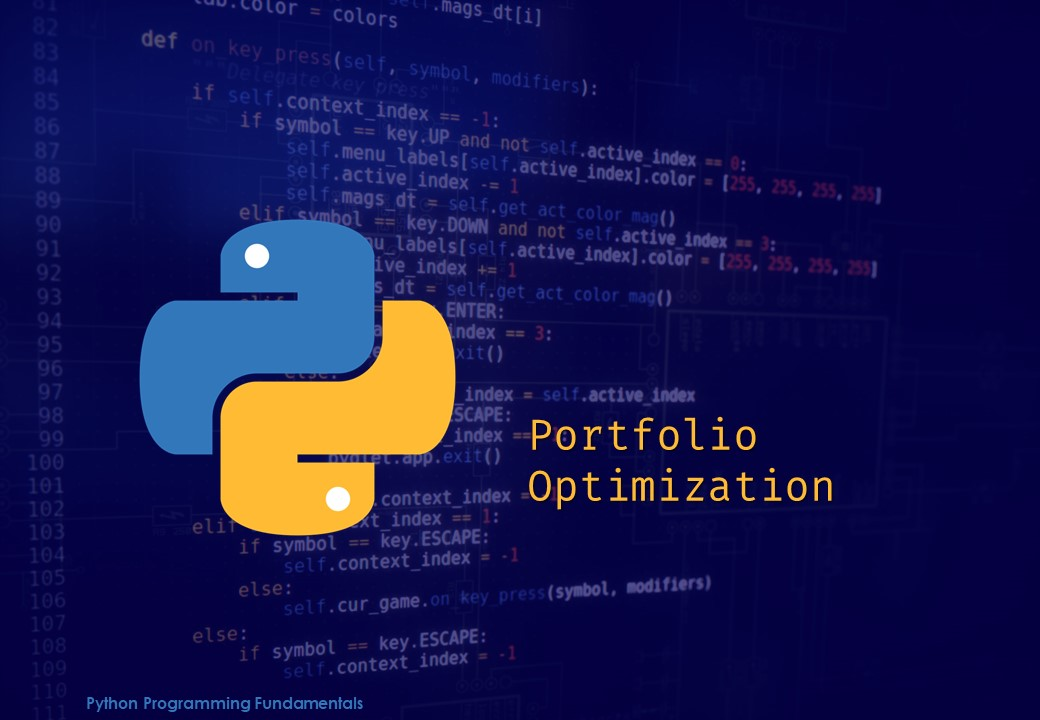

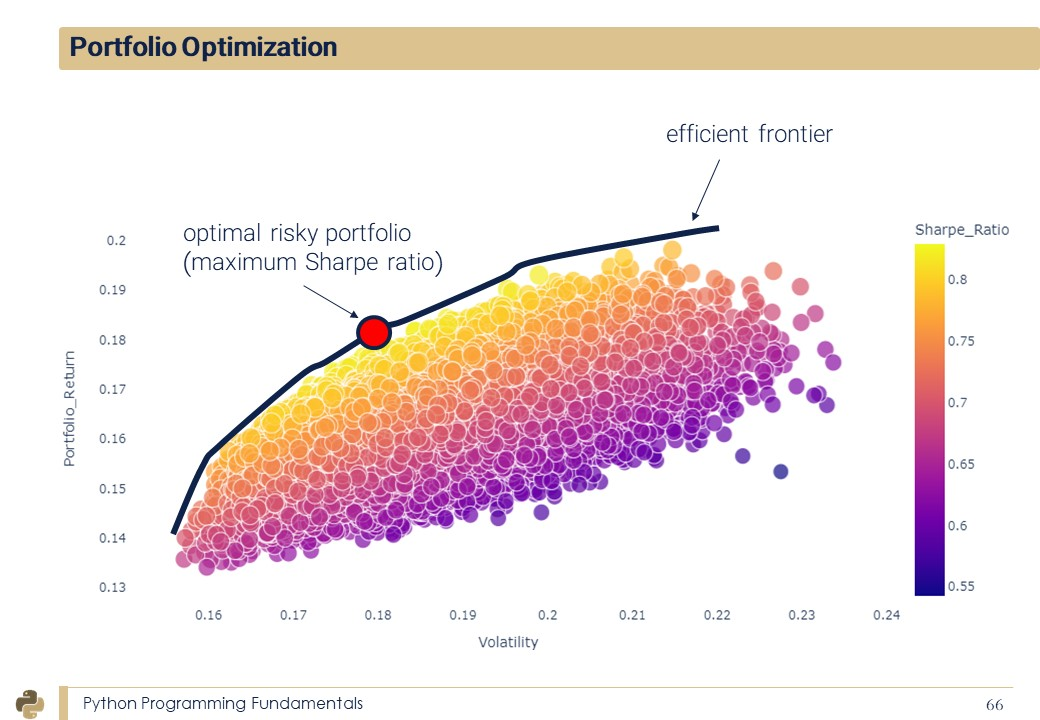

In [ ]:
# List all Sharpe ratios generated from the simulation
sharpe_ratio_runs

In [ ]:
# Return the index of the maximum Sharpe ratio (Best simulation run) 
sharpe_ratio_runs.argmax()

In [ ]:
# Return the maximum Sharpe ratio value
sharpe_ratio_runs.max()

In [ ]:
weights_runs

In [ ]:
# Obtain the portfolio weights that correspond to the maximum Sharpe ratio (Golden set of weights!)
weights_runs[sharpe_ratio_runs.argmax(), :]

In [ ]:
# Return Sharpe ratio, volatility corresponding to the best weights allocation (maximum Sharpe ratio)
optimal_portfolio_return, optimal_volatility, optimal_sharpe_ratio, highest_final_value, optimal_return_on_investment = simulation_engine(weights_runs[sharpe_ratio_runs.argmax(), :], initial_investment)

In [ ]:
print('Best Portfolio Metrics Based on {} Monte Carlo Simulation Runs:'.format(sim_runs))
print('  - Portfolio Expected Annual Return = {:.02f}%'.format(optimal_portfolio_return * 100))
print('  - Portfolio Standard Deviation (Volatility) = {:.02f}%'.format(optimal_volatility * 100))
print('  - Sharpe Ratio = {:.02f}'.format(optimal_sharpe_ratio))
print('  - Final Value = ${:.02f}'.format(highest_final_value))
print('  - Return on Investment = {:.02f}%'.format(optimal_return_on_investment))

In [ ]:
# Create a DataFrame that contains volatility, return, and Sharpe ratio for all simualation runs
sim_out_df = pd.DataFrame({'Volatility': volatility_runs.tolist(), 'Portfolio_Return': expected_portfolio_returns_runs.tolist(), 'Sharpe_Ratio': sharpe_ratio_runs.tolist() })
sim_out_df

In [ ]:
# Plot volatility vs. return for all simulation runs
# Highlight the volatility and return that corresponds to the highest Sharpe ratio
import plotly.graph_objects as go
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.update_layout({'plot_bgcolor': "white"})
fig.show()


# Use this code if Sharpe ratio is negative
# fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )


In [ ]:
# Let's highlight the point with the highest Sharpe ratio
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.add_trace(go.Scatter(x = [optimal_volatility], y = [optimal_portfolio_return], mode = 'markers', name = 'Optimal Point', marker = dict(size=[40], color = 'red')))
fig.update_layout(coloraxis_colorbar = dict(y = 0.7, dtick = 5))
fig.update_layout({'plot_bgcolor': "white"})
fig.show()

**PRACTICE:**
- **Using Plotly Express, perform the following tasks:** 
     - **plot the portfolio volatility (y-axis) vs. simulation run number (x-axis)**
     - **Plot the portfolio return (y-axis) vs. simulation run number (x-axis)**
     -  **Plot the Sharpe ratio (y-axis) vs. simulation run number (x-axis)**
- **Perform a sanity check by identifying the optimal simulation run that results in the highest Sharpe ratio**

# PRACTICE SOLUTIONS:

**PRACTICE SOLUTION:**
- **Using Pandas library, read JPMorgan Chase & Co. stock prices data contained in "JPM.csv" file and place it in a Pandas DataFrame**
- **Count the number of Null or missing values in the Pandas DataFrame**
- **What is the memory usage of this DataFrame?**

In [ ]:
# Use Pandas to read stock data (the csv file is included in the course package) 
JPM_df = pd.read_csv('JPM.csv')
JPM_df

In [ ]:
JPM_df.isnull().sum()

In [ ]:
JPM_df.info()

**PRACTICE SOLUTION:**
- **Using the adjusted closing price, calculate the percentage daily return for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022.**
- **Calculate the maximum percentage daily return for JPMorgan Chase & Co. stock over the same time period.**

In [ ]:
# Calculate the percentage daily return
# Note that we had to replace the first row with zeros instead of NaN
JPM_df['Daily Return'] = JPM_df['Adj Close'].pct_change(1) * 100
JPM_df['Daily Return'].replace(np.nan, 0, inplace = True)
JPM_df

In [ ]:
JPM_df.describe()

**PRACTICE SOLUTION:**
- **Plot the high, low, open, close and adjusted close price for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022 using Plotly Express library.**
- **Plot the trading volume for JPMorgan Chase & Co. stock during the same time period using Plotly Express Library.**
- **Plot the percentage daily return during the same time period using Plotly Express. Perform a sanity check by comparing the maximum percentage daily return calculated in the previous practice opportunity to the maximum value shown on the graph.**

In [ ]:
JPM_df

In [ ]:
# Plot interactive chart
plot_financial_data(JPM_df.drop(['Volume', 'Daily Return'], axis = 1), 'JPMorgan Chase & Co. Stock Price [$]')

In [ ]:
# Plot trading volume (Note that the position of the Volume column is different compared to Amazon's DataFrame)
plot_financial_data(JPM_df.iloc[:,[0,6]], 'JPMorgan Chase & Co. Trading Volume')

In [ ]:
# Plot % Daily Returns
plot_financial_data(JPM_df.iloc[:,[0,7]], 'JPMorgan Chase & Co. Percentage Daily Return [%]')

**PRACTICE SOLUTION:**
- **Using Matplotlib library, plot a similar pie chart for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022.**

In [ ]:
# Apply the function to the "Daily Return" Column and place the result in "Trend" column
JPM_df['Trend'] = JPM_df['Daily Return'].apply(percentage_return_classifier)
JPM_df

In [ ]:
# Count distinct values in the Trend column
trend_summary = JPM_df['Trend'].value_counts()
trend_summary

In [ ]:
# Plot a pie chart using Matplotlib Library
plt.figure(figsize = (10, 10))
trend_summary.plot(kind = 'pie', y = 'Trend');

**PRACTICE SOLUTION:**
- **Using Cufflinks, plot candlestick chart for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022. Remember to set the "Date" column as the index for "JPM_df" Pandas DataFrame.** 
- **Display the simple moving average with 30 and 100 days window on the previously generated candlestick graph.**
- **Display the Bollinger bands on a new candlestick graph. Bollinger bands are powerful technical analysis tool that contain 3 lines: (1) a simple moving average (middle band), (2) an upper and (3) a lower band. Choose a window length of 20 periods and 2 standard deviations. [external research is required]**

In [ ]:
# Set the date to be the index for the Pandas DataFrame
# This is critical to show the date on the x-axis when using cufflinks
JPM_df.set_index(['Date'], inplace = True)
JPM_df

In [ ]:
# Plot Candlestick Figure using Cufflinks
figure = cf.QuantFig(JPM_df, title = 'JPMorgan and Chase Co. Candlestick Chart', name = 'JPM')
figure.add_sma(periods =[30, 100], column = 'Close', color = ['magenta', 'green'])
figure.iplot(theme = 'white', up_color = 'green', down_color = 'red')

In [ ]:
# Plot Candlestick figure using Cufflinks
figure = cf.QuantFig(JPM_df, title = 'JPMorgan and Chase Co. Candlestick Chart', name = 'JPM')
# Let's display the bollinger bands
figure.add_bollinger_bands(periods = 20, boll_std = 2, colors = ['yellow', 'blue'], fill = True)
figure.iplot()

**PRACTICE SOLUTION:**
- **Using "price_scaling" and "plot_financial_data" functions, plot the scaled data for all stocks.**
- **Based on the generated graph, which stock had the best and worst performance?** 

In [ ]:
# Plot scaled stock prices
plot_financial_data(price_scaling(close_price_df), 'Scaled Stock Closing Prices [$]')

**PRACTICE SOLUTION:**
- **Assume we now have 10 stocks under consideration, test the function using the new number of stocks.** 
- **Perform a sanity check and ensure that the sum of all weights is equal to 1.**

In [ ]:
# Call the function (Run this cell multiple times to generate different outputs)
weights = generate_portfolio_weights(10)
print(weights)

In [ ]:
# If you sum up all random weights, they should add up to 1
weights.sum()

**PRACTICE SOLUTION:** 
- **Generate 3 different random weights and perform asset allocation using the pre-defined "asset_allocation" function.** 
- **Compare the final portfolio value on December 16th, 2022 to the initial investment ($1M) on January 2nd, 2014. Comment on your results.**
- *Hint: you will need to run the code 3 different times and examine the results. No additional code is required.*

In [ ]:
# Run the code 3 times and record the final value of the portfolio along with the weights 

# Portfolio Final Value in Run #1 = , weights = 
# Portfolio Final Value in Run #2 = , weights = 
# Portfolio Final Value in Run #3 = , weights = 


**PRACTICE SOLUTION:** 
- **Assume that you decided to perform equal asset allocation among the 10 available stocks in "portfolio_df" DataFrame. Complete the following tasks:** 
    - **Define a new "weights" list that contains equal allocation among all assets.**
    - **Call "simulation_engine" function and send it the new weights. Record the Sharpe ratio and portfolio final value.**
    - **Assume that the risk-free rate is now set to 1%. How does that change impact Sharpe ratio? confirm your answer by changing the risk free-rate, running the code, and recording the new Sharpe ratio.** 

In [ ]:
# Assume equal weights allocation
weights = np.ones(10) * 0.1
weights

In [ ]:
# Let's test out the "simulation_engine" function and print out statistical metrics
# Define the initial investment amount
initial_investment = 1000000
portfolio_metrics = simulation_engine(weights, initial_investment)

print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[0] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[2]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[3]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[4]))

In [ ]:
# Portfolio performance with equal weights allocation (Rf = 3%)
    # Expected Portfolio Annual Return = 16.30%
    # Portfolio Standard Deviation (Volatility) = 18.02%
    # Sharpe Ratio = 0.74
    # Portfolio Final Value = $3203874.76
    # Return on Investment = 220.39%


# Portfolio performance with equal weights allocation (Rf = 1%)
    # Expected Portfolio Annual Return = 16.30%
    # Portfolio Standard Deviation (Volatility) = 18.02%
    # Sharpe Ratio = 0.85
    # Portfolio Final Value = $3203874.76
    # Return on Investment = 220.39%
    
# For the same portfolio (with similar weights), lowering the risk-free rate will increase Sharpe ratio. 

**PRACTICE SOLUTION:** 
- **Run Monte Carlo Simulations for 50 and 10000 runs.**
- **Record the minimum Sharpe ratio in each case. Comment on the results.**

In [ ]:
# Return the minimum Sharpe ratio
sharpe_ratio_runs.min().round(4)
# Min Sharpe Ratio after 50 runs = 0.6406
# Min Sharpe Ratio after 10,000 runs = 0.5838

**PRACTICE SOLUTION:**
- **Using Plotly Express, perform the following tasks:** 
     - **plot the portfolio volatility (y-axis) vs. simulation run number (x-axis)**
     - **Plot the portfolio return (y-axis) vs. simulation run number (x-axis)**
     -  **Plot the Sharpe ratio (y-axis) vs. simulation run number (x-axis)**
- **Perform a sanity check by identifying the optimal simulation run that results in the highest Sharpe ratio**

In [ ]:
# Plot interactive plot for volatility
fig = px.line(sim_out_df, y = 'Volatility')
fig.show()

In [ ]:
# Plot interactive plot for Portfolio Return
fig = px.line(sim_out_df, y = 'Portfolio_Return')
fig.update_traces(line_color = 'red')
fig.show()

In [ ]:
# Plot interactive plot for Portfolio Return
fig = px.line(sim_out_df, y = 'Sharpe_Ratio')
fig.update_traces(line_color = 'purple')
fig.show()

# EXCELLENT JOB!